In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("Resources/startup_data_cleaned.csv")
data = data.drop("Unnamed: 0", axis=1)

data["age_first_milestone_year"] = data["age_first_milestone_year"].fillna(value=0)
data["age_last_milestone_year"] = data["age_last_milestone_year"].fillna(value=0)

In [23]:
X = data.drop("labels", axis= 1)
y = data["labels"]

In [24]:
#### Create train and transform data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
### Scale the data 
scaler = StandardScaler()

# fit the data
X_scaler = scaler.fit(X_train)

# Transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
### Create 2 models without PCA

#Start with logistic regression 
model = LogisticRegression(solver="lbfgs", random_state=42)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [31]:
# print Scores
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.7575757575757576
[[ 49  36]
 [ 20 126]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        85
           1       0.78      0.86      0.82       146

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [93]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

In [94]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.8138528138528138
[[ 50  35]
 [  8 138]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70        85
           1       0.80      0.95      0.87       146

    accuracy                           0.81       231
   macro avg       0.83      0.77      0.78       231
weighted avg       0.82      0.81      0.80       231

6.429417190005267


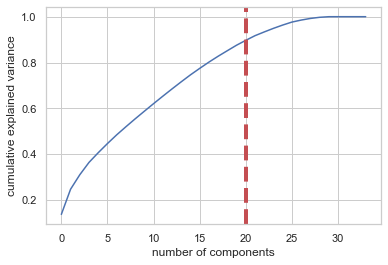

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.136897,0.136897
1,0.246626,0.109729
2,0.309848,0.063222
3,0.363830,0.053982
4,0.406120,0.042290
5,0.446112,0.039992
6,0.484111,0.037999
7,0.519461,0.035350
8,0.553890,0.034430
9,0.587272,0.033382


In [59]:
#### Create same 2 models with PCA transformation
pca_test = PCA(n_components=34)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df.head(10)

In [60]:
pca = PCA(n_components= 20)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [58]:
rf = RandomForestClassifier(n_estimators= 200)


In [62]:
rf.fit(X_train_scaled_pca, y_train)
y_pred= rf.predict(X_test_scaled_pca)

In [91]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.7272727272727273
[[ 43  42]
 [ 21 125]]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        85
           1       0.75      0.86      0.80       146

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

9.41981167087204


In [65]:
#Logistic Regression
log_model = LogisticRegression(random_state=42)

In [66]:
log_model.fit(X_train_scaled_pca, y_train)
predictions = log_model.predict(X_test_scaled_pca)

In [90]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print(log_loss(y_test, predictions))

0.7575757575757576
[[ 50  35]
 [ 21 125]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        85
           1       0.78      0.86      0.82       146

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

8.373157852922317


In [68]:
import tensorflow as tf

c:\Users\OMEN\anaconda3\envs\mlenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject
  return f(*args, **kwds)


In [82]:
nn_model2 = tf.keras.models.Sequential()

In [83]:
nn_model2.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=34))
nn_model2.add(tf.keras.layers.Dense(units=50, activation="tanh"))
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [84]:
nn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                2800      
                                                                 
 dense_10 (Dense)            (None, 50)                4050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,901
Trainable params: 6,901
Non-trainable params: 0
_________________________________________________________________


In [85]:
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [86]:
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.5762 - accuracy: 0.7182
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7645
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7818
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7934
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7948
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.7991
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8092
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8078
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8223
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8382
Epoch 11/

<AxesSubplot:>

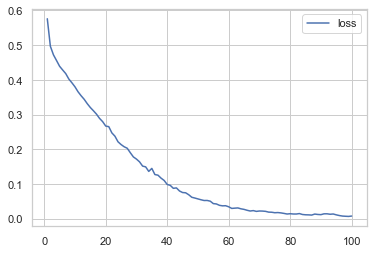

In [87]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

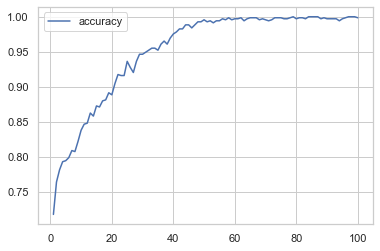

In [88]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 4s - loss: 1.5218 - accuracy: 0.7186 - 4s/epoch - 460ms/step
Loss: 1.5217796564102173, Accuracy: 0.7186146974563599
